In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from sklearn.metrics import r2_score, confusion_matrix, classification_report, mean_squared_error
from scipy.stats import spearmanr
%matplotlib inline

In [2]:
nvals = [128, 256]
cnns = ["1dcnn", "2dcnn"]
blocks = range(1, 4)
scenarios = [f"n{n}_cosine_{cnn}_log_{b}blocks" for n in nvals for cnn in cnns for b in blocks]
print(scenarios)
names = ["N0", "t1", "N1", "t2", "N2"]


['n128_cosine_1dcnn_log_1blocks', 'n128_cosine_1dcnn_log_2blocks', 'n128_cosine_1dcnn_log_3blocks', 'n128_cosine_2dcnn_log_1blocks', 'n128_cosine_2dcnn_log_2blocks', 'n128_cosine_2dcnn_log_3blocks', 'n256_cosine_1dcnn_log_1blocks', 'n256_cosine_1dcnn_log_2blocks', 'n256_cosine_1dcnn_log_3blocks', 'n256_cosine_2dcnn_log_1blocks', 'n256_cosine_2dcnn_log_2blocks', 'n256_cosine_2dcnn_log_3blocks']


{'n128_cosine_1dcnn_log_1blocks': {}, 'n128_cosine_1dcnn_log_2blocks': {}, 'n128_cosine_1dcnn_log_3blocks': {}, 'n128_cosine_2dcnn_log_1blocks': {}, 'n128_cosine_2dcnn_log_2blocks': {}, 'n128_cosine_2dcnn_log_3blocks': {}, 'n256_cosine_1dcnn_log_1blocks': {}, 'n256_cosine_1dcnn_log_2blocks': {}, 'n256_cosine_1dcnn_log_3blocks': {}, 'n256_cosine_2dcnn_log_1blocks': {}, 'n256_cosine_2dcnn_log_2blocks': {}, 'n256_cosine_2dcnn_log_3blocks': {}}


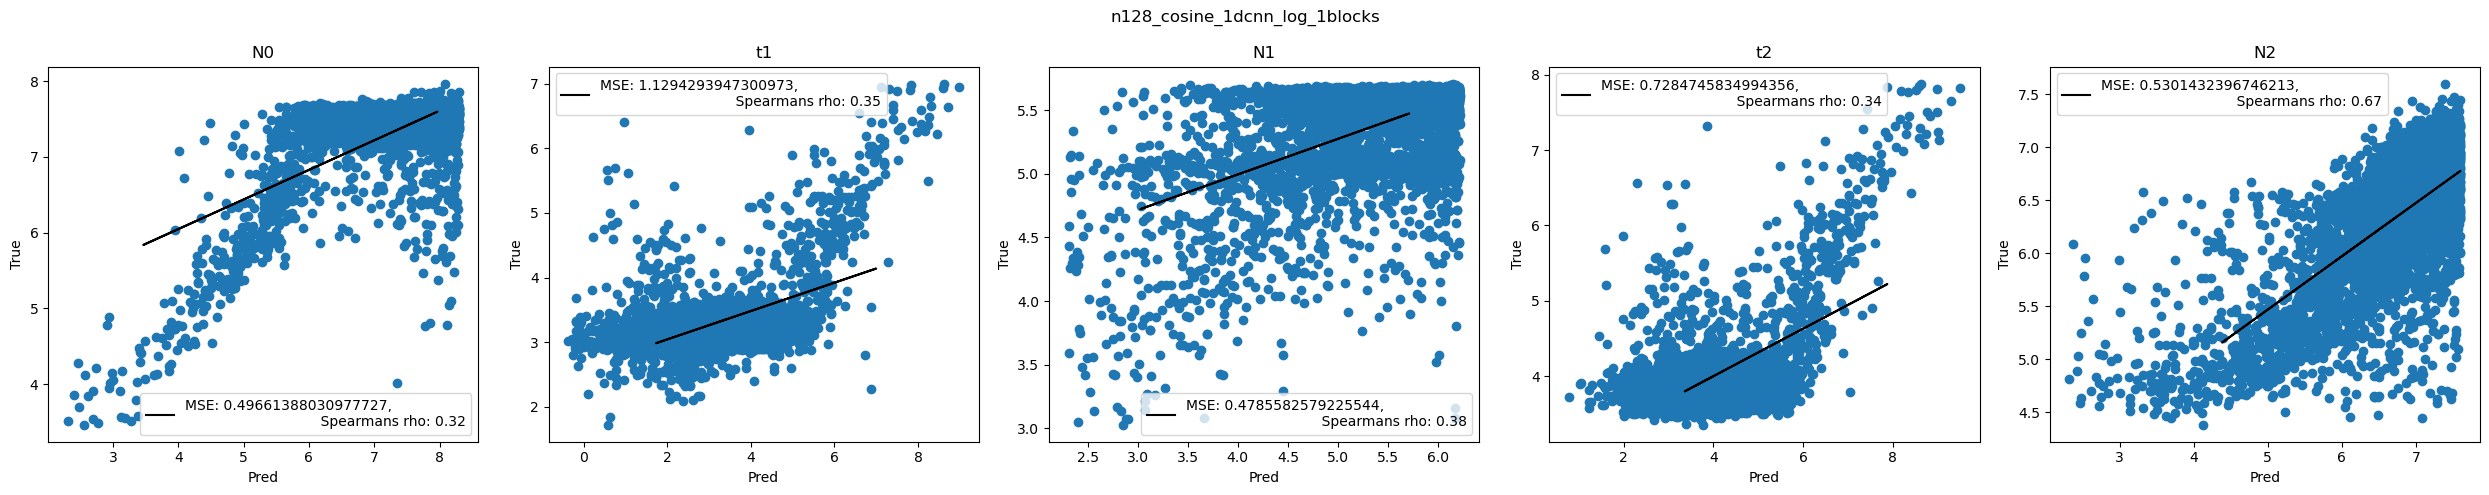

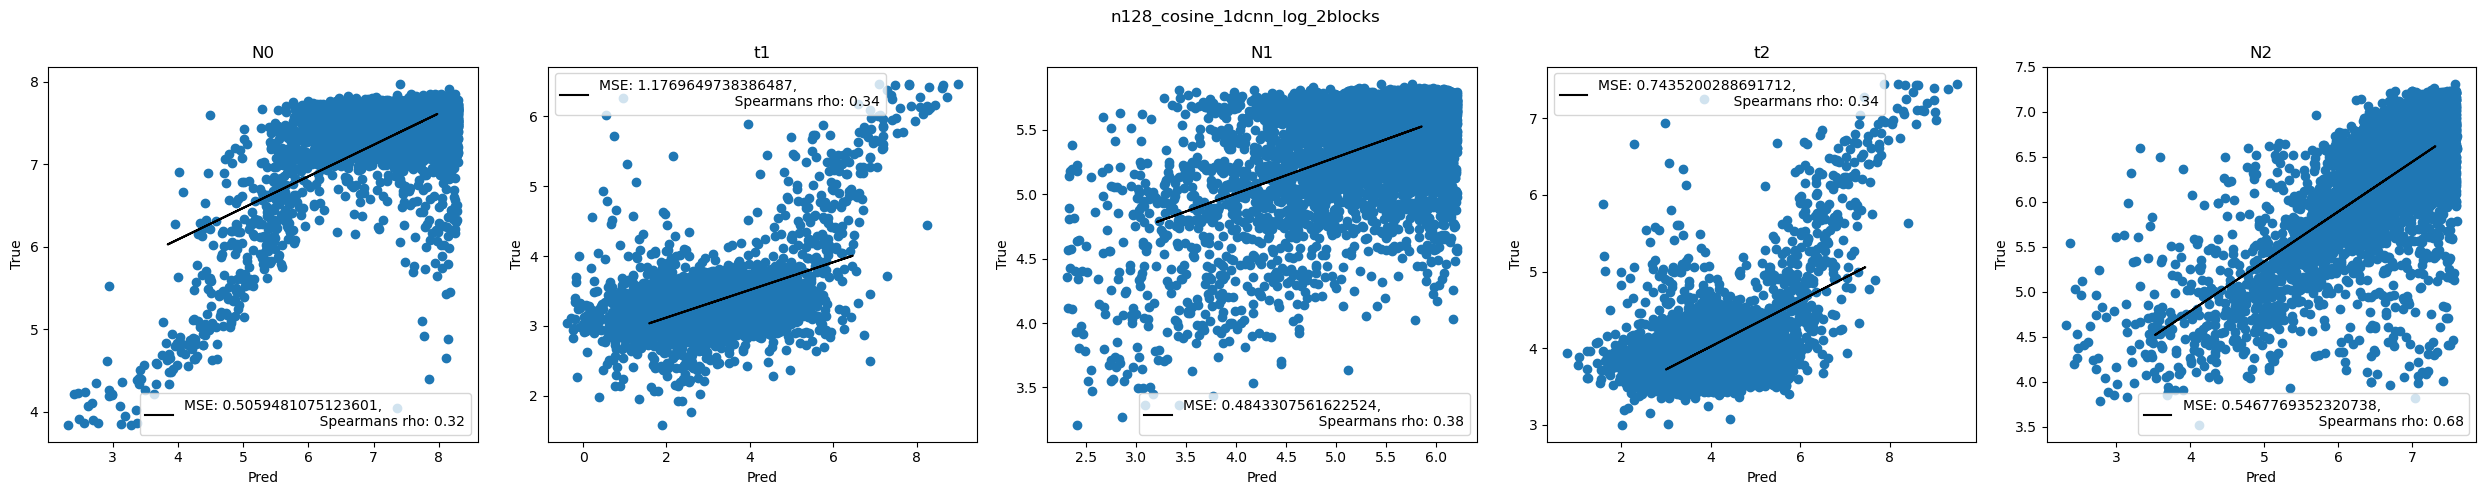

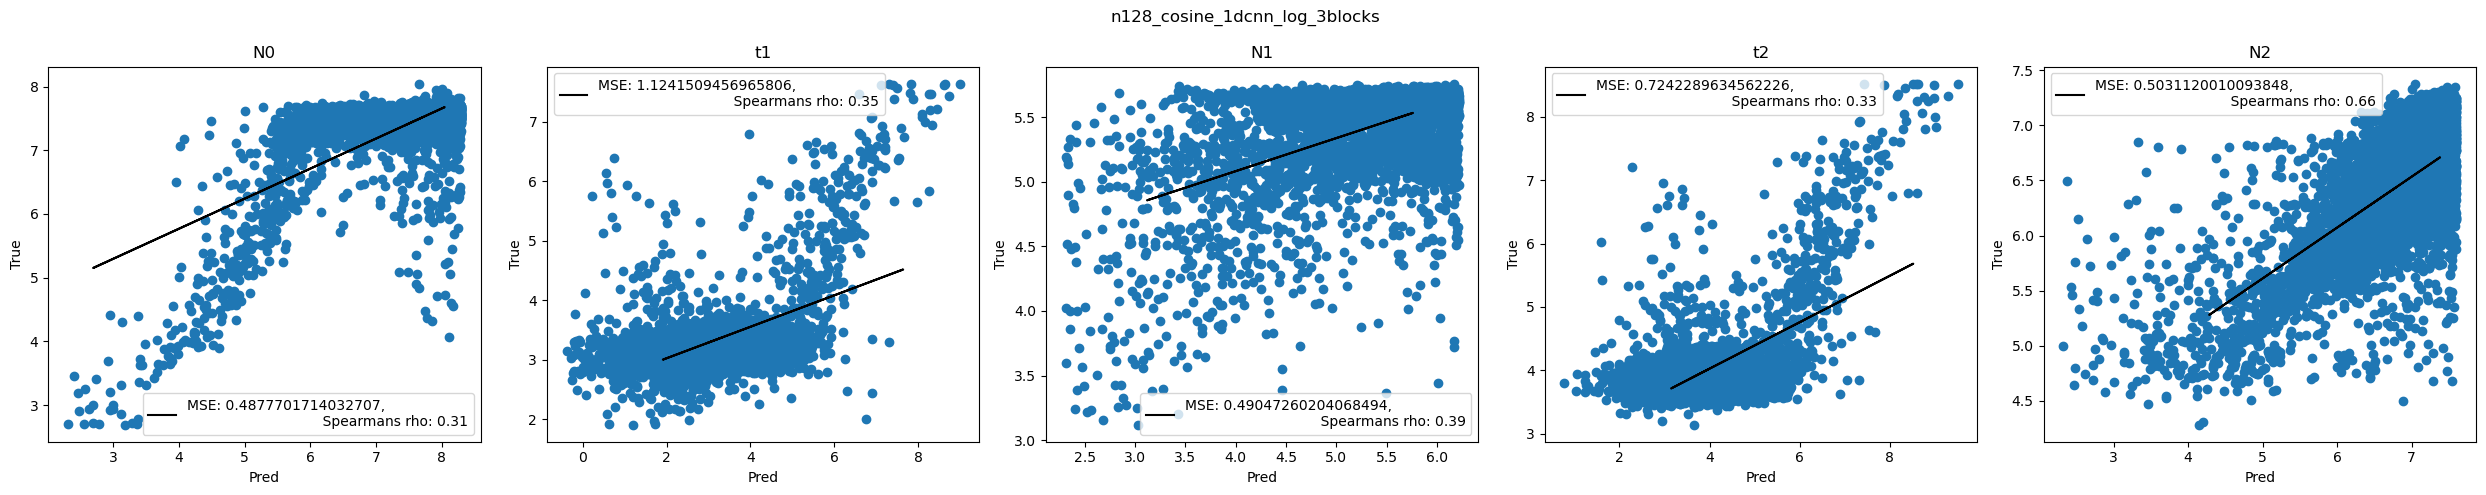

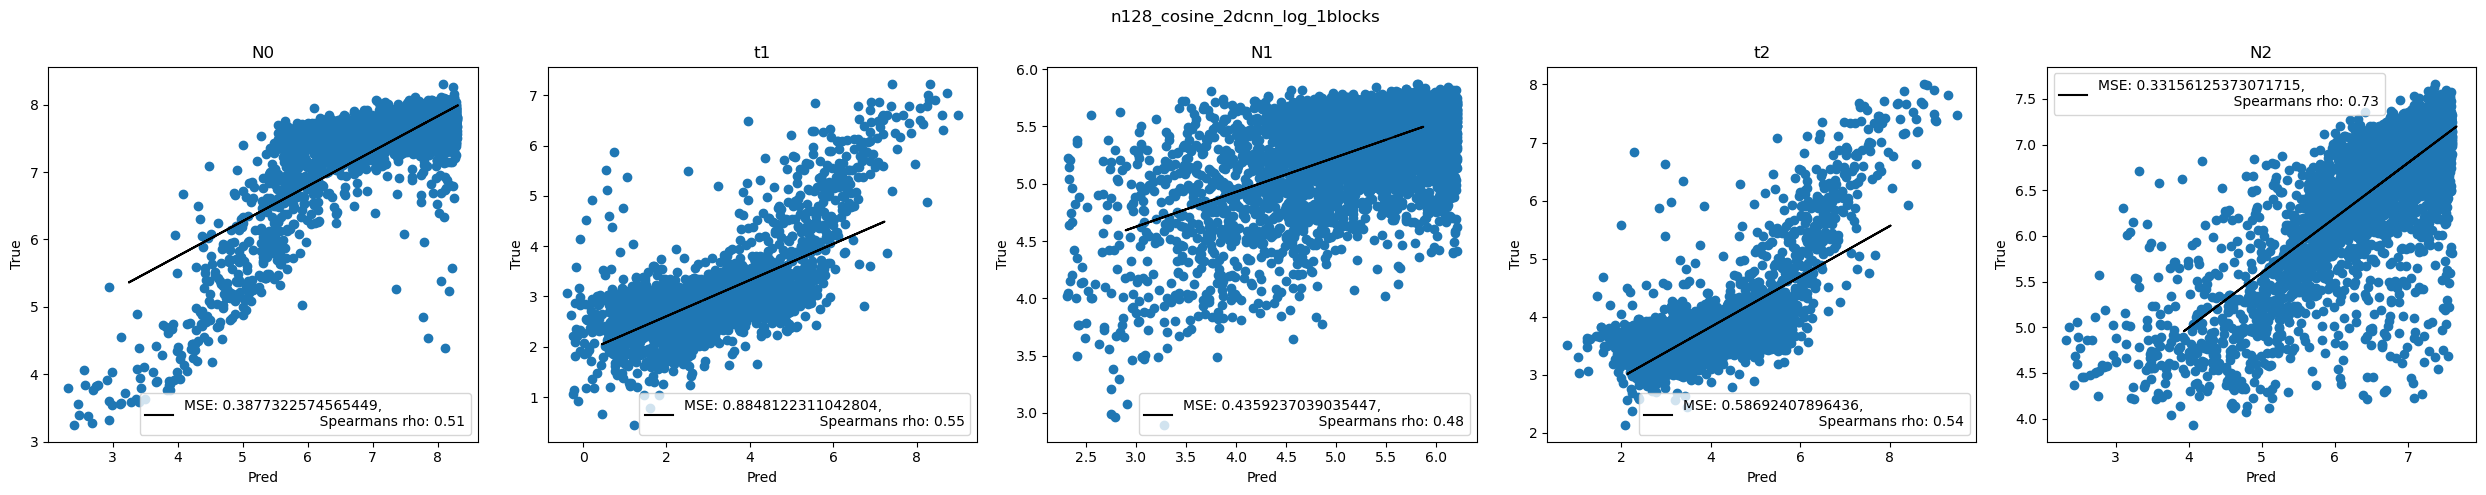

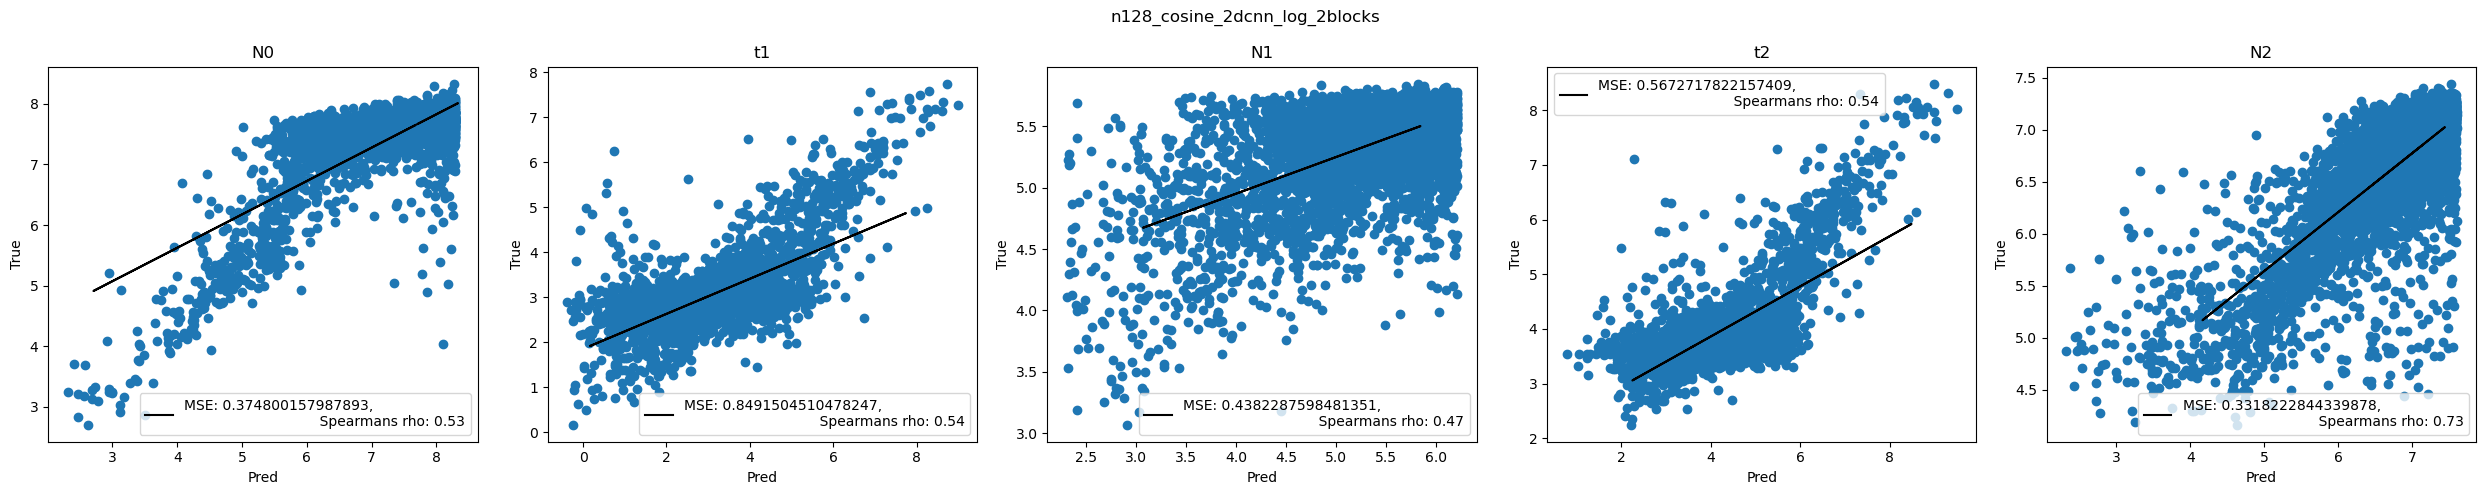

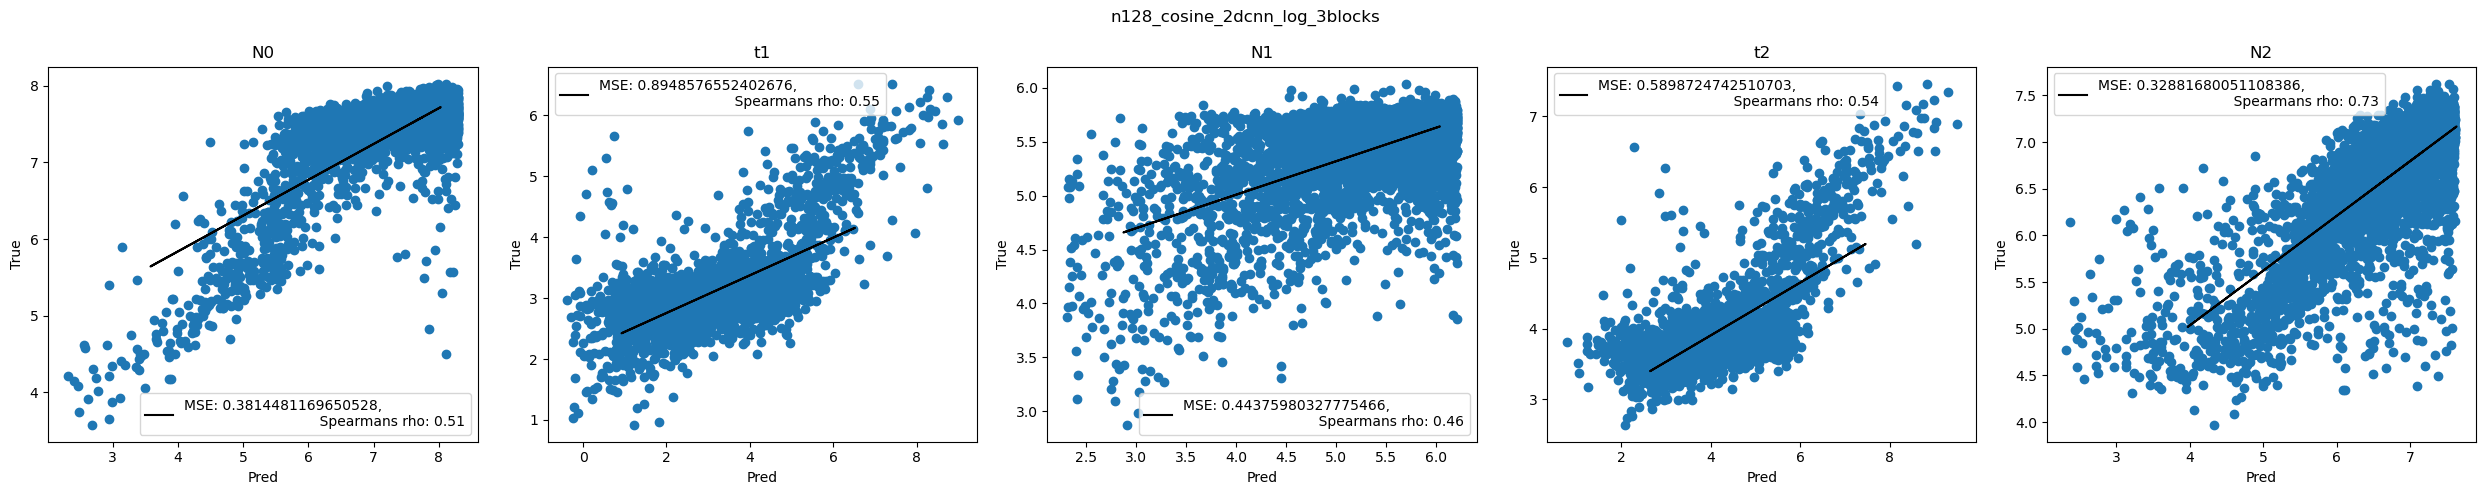

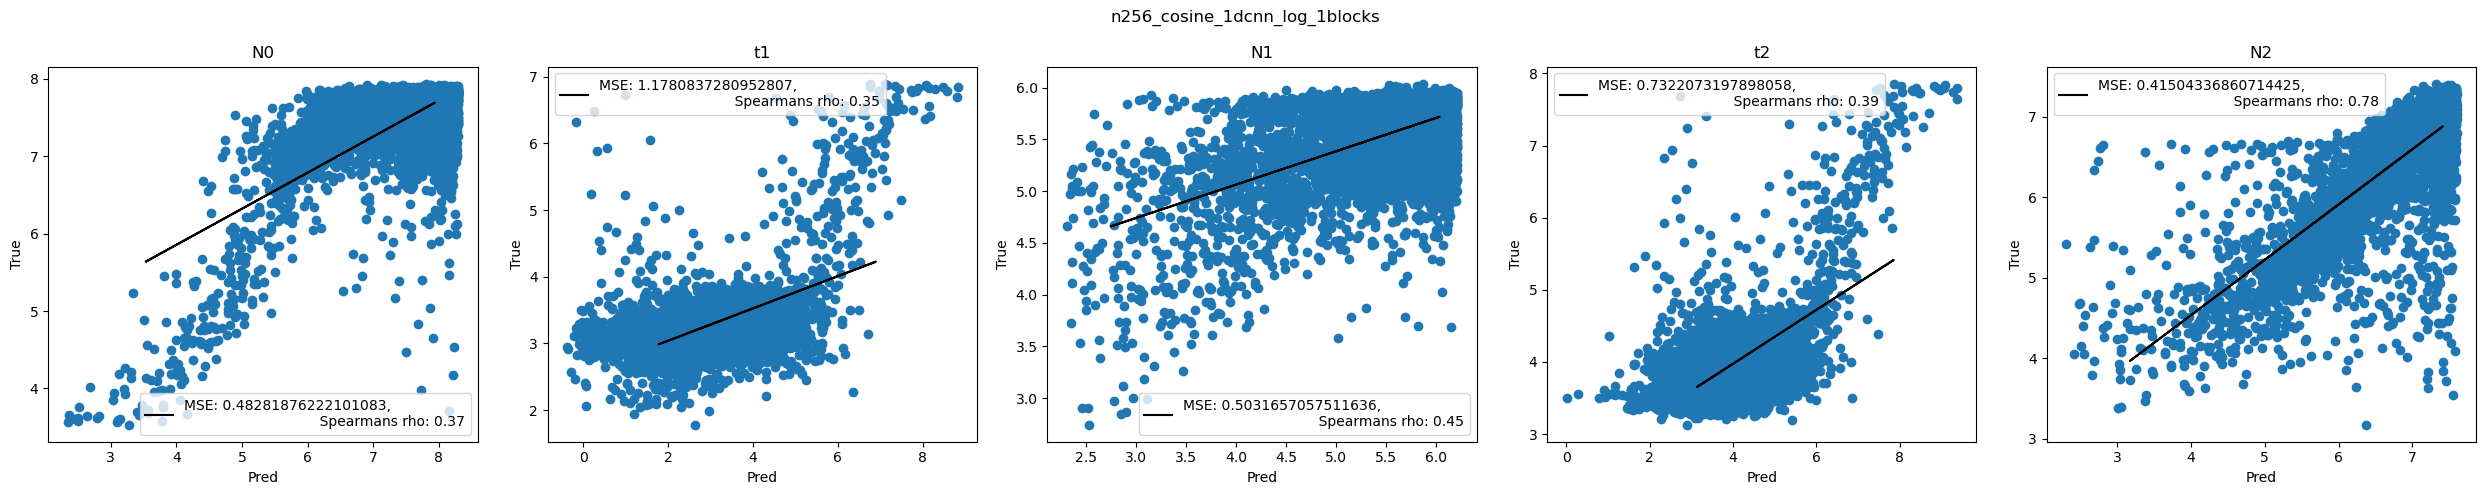

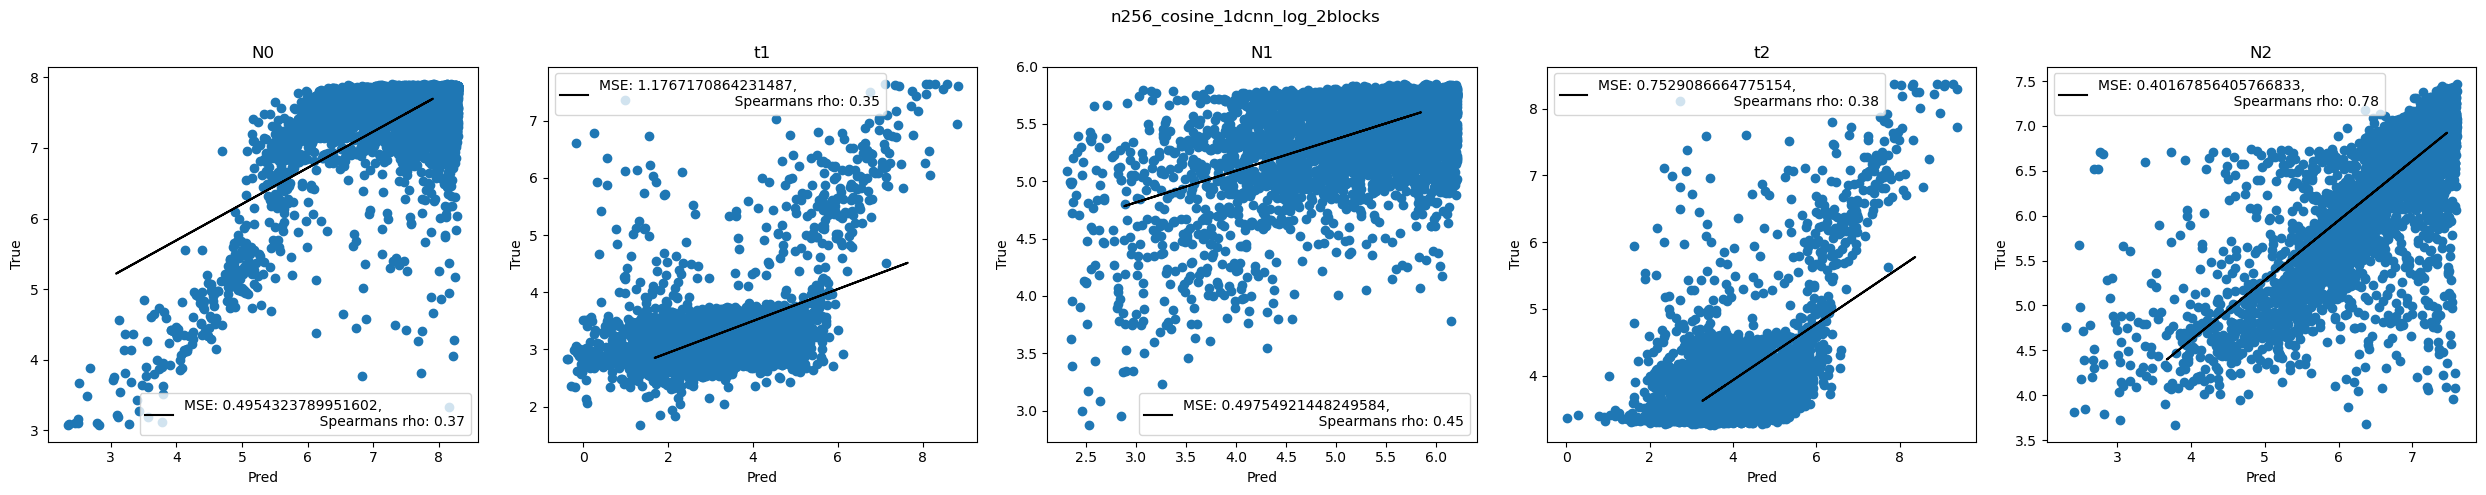

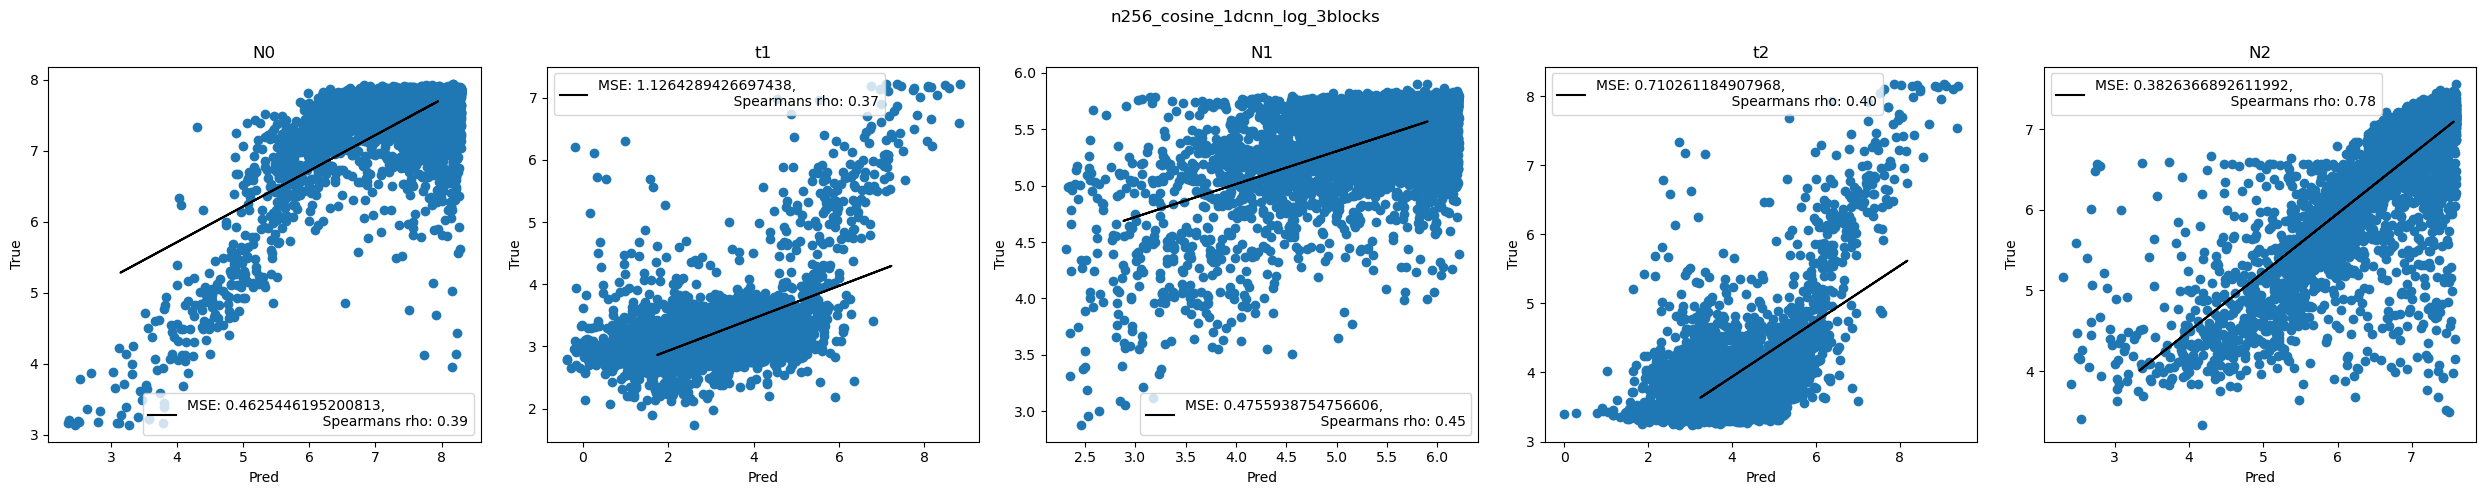

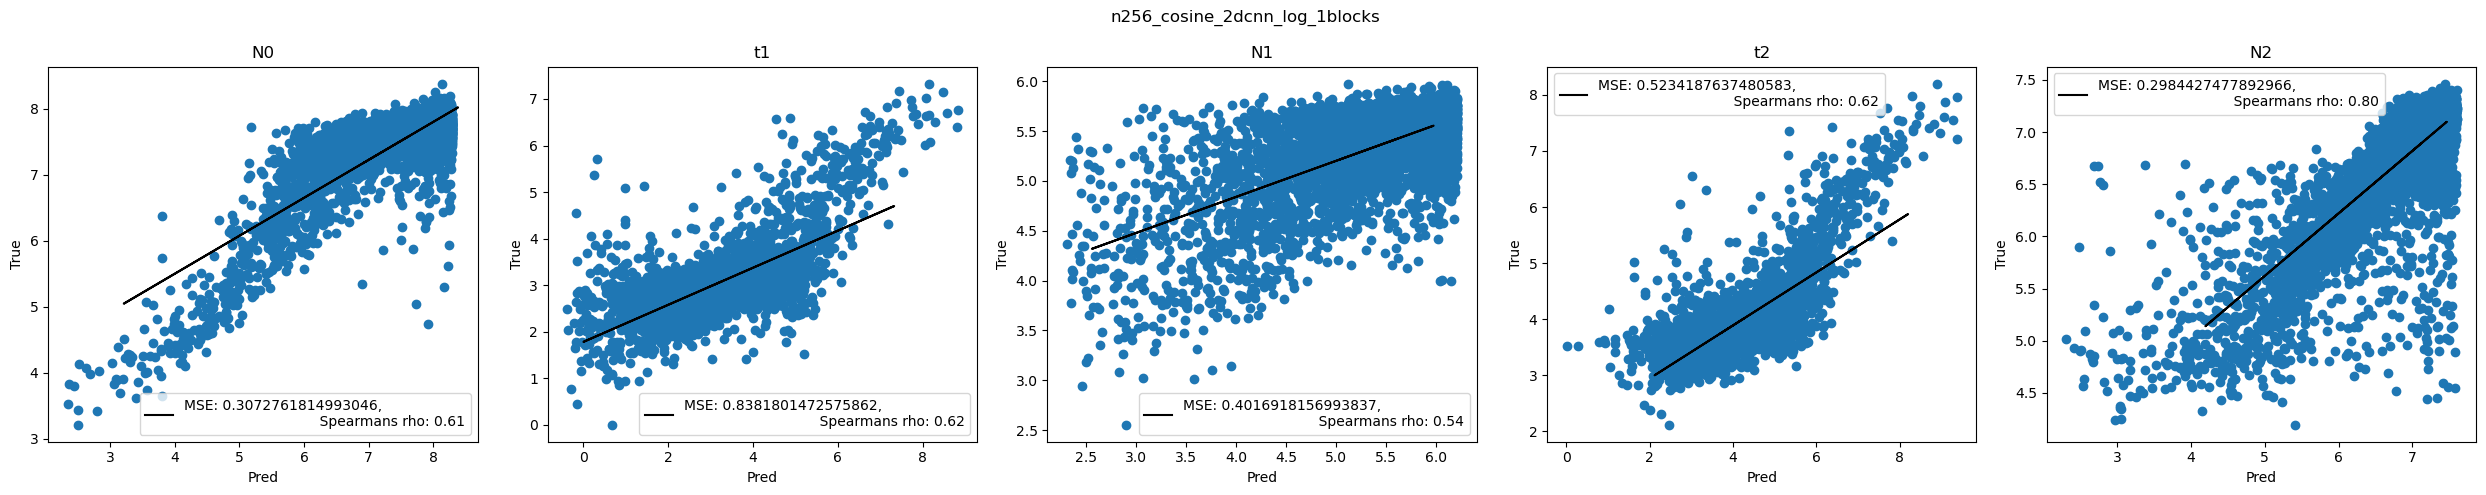

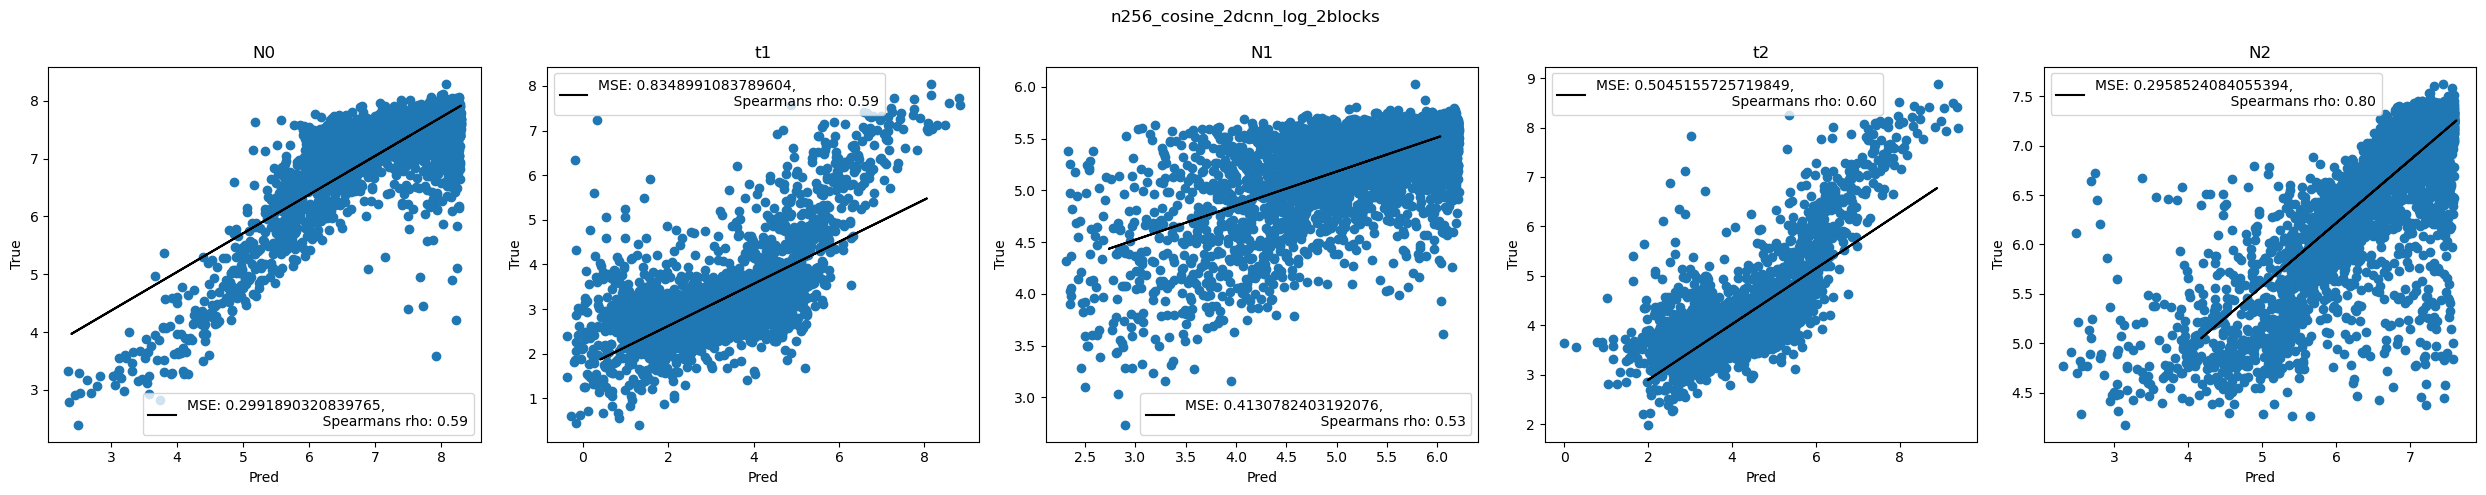

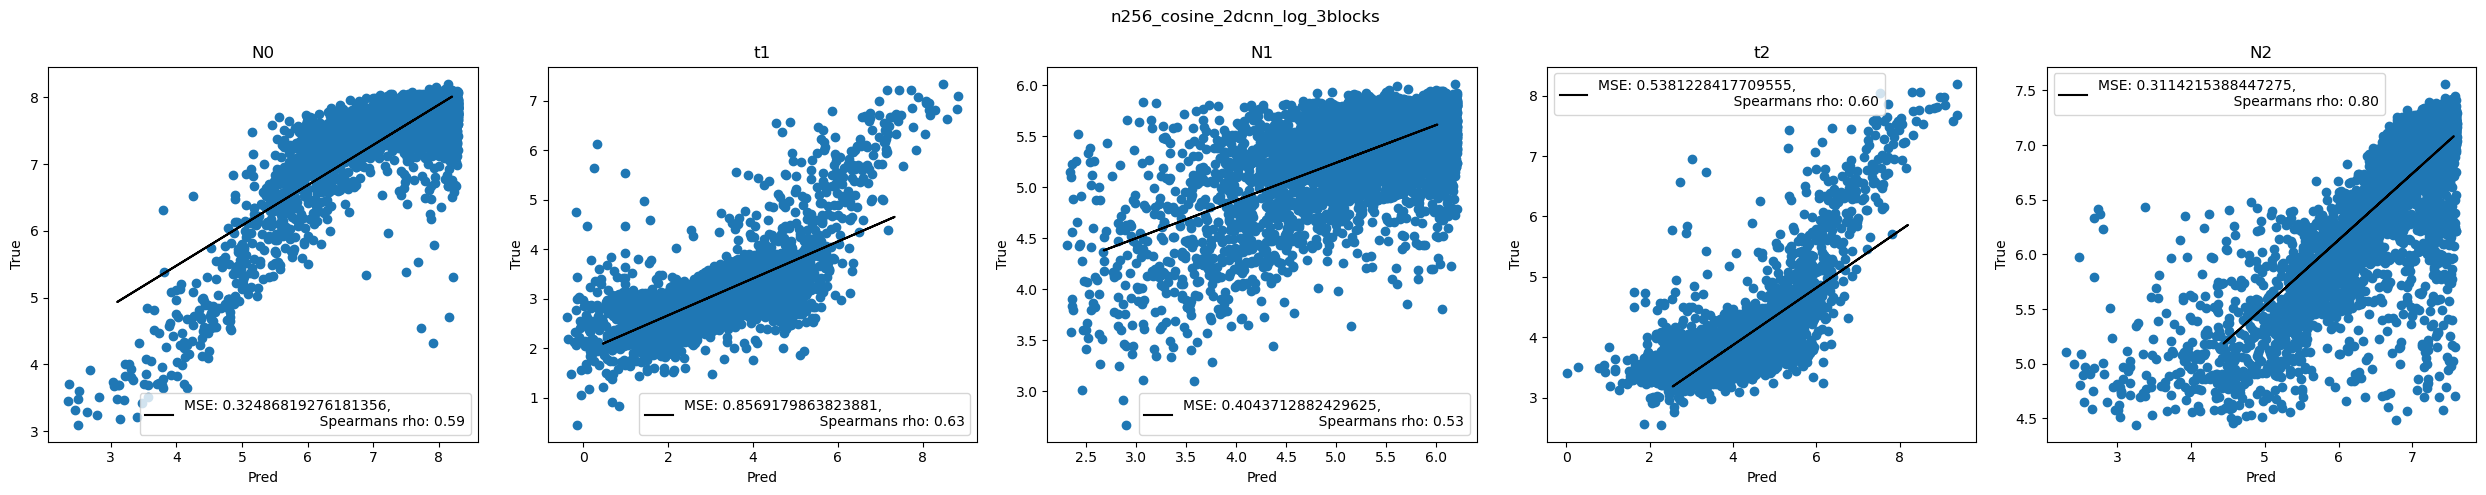

In [32]:
res_dict = {i:{} for i in scenarios for n in names}
for s in scenarios:
        preds = pd.read_csv(f"demo/results/{s}/{s}_preds.csv")
        plot, axes = plt.subplots(1, len(names))
        plot.set_size_inches(25, 5)

        for idx, name in enumerate(names):
                axes[idx].scatter(preds[f"true_{name}"], preds[f"pred_{name}"])
                m, b = np.polyfit(preds[f"true_{name}"], preds[f"pred_{name}"], 1)
                mse = mean_squared_error(preds[f"true_{name}"], preds[f"pred_{name}"])
                res_dict[s][name]=mse
                axes[idx].plot(preds[f"pred_{name}"], m*preds[f"pred_{name}"]+b, color="black", label=f'''MSE: {mse}, 
                               Spearmans rho: {spearmanr(preds[f"true_{name}"], preds[f"pred_{name}"])[0]:.2f}''')
                axes[idx].legend()
                axes[idx].set_title(name)
                axes[idx].set_ylabel("True")
                axes[idx].set_xlabel("Pred")
        plt.suptitle(s)
        plt.tight_layout()
        plt.savefig(f"demo/results/{s}_mergedfig.png")
        


In [43]:
df =  pd.DataFrame(res_dict).transpose()
df = df.rename_axis("scenarios").reset_index()
df["mean"] = df[names].mean(axis=1)
print(df)
df.to_csv("demo/results/mses.csv", index=False)

                        scenarios        N0        t1        N1        t2   
0   n128_cosine_1dcnn_log_1blocks  0.496614  1.129429  0.478558  0.728475  \
1   n128_cosine_1dcnn_log_2blocks  0.505948  1.176965  0.484331  0.743520   
2   n128_cosine_1dcnn_log_3blocks  0.487770  1.124151  0.490473  0.724229   
3   n128_cosine_2dcnn_log_1blocks  0.387732  0.884812  0.435924  0.586924   
4   n128_cosine_2dcnn_log_2blocks  0.374800  0.849150  0.438229  0.567272   
5   n128_cosine_2dcnn_log_3blocks  0.381448  0.894858  0.443760  0.589872   
6   n256_cosine_1dcnn_log_1blocks  0.482819  1.178084  0.503166  0.732207   
7   n256_cosine_1dcnn_log_2blocks  0.495432  1.176717  0.497549  0.752909   
8   n256_cosine_1dcnn_log_3blocks  0.462545  1.126429  0.475594  0.710261   
9   n256_cosine_2dcnn_log_1blocks  0.307276  0.838180  0.401692  0.523419   
10  n256_cosine_2dcnn_log_2blocks  0.299189  0.834899  0.413078  0.504516   
11  n256_cosine_2dcnn_log_3blocks  0.324868  0.856918  0.404371  0.538123   

In [42]:
df

,scenarios,N0,t1,N1,t2,N2,mean
0,n128_cosine_1dcnn_log_1blocks,0.496614,1.129429,0.478558,0.728475,0.530143,0.672644
1,n128_cosine_1dcnn_log_2blocks,0.505948,1.176965,0.484331,0.743520,0.546777,0.691508
2,n128_cosine_1dcnn_log_3blocks,0.487770,1.124151,0.490473,0.724229,0.503112,0.665947
3,n128_cosine_2dcnn_log_1blocks,0.387732,0.884812,0.435924,0.586924,0.331561,0.525391
4,n128_cosine_2dcnn_log_2blocks,0.374800,0.849150,0.438229,0.567272,0.331822,0.512255
5,n128_cosine_2dcnn_log_3blocks,0.381448,0.894858,0.443760,0.589872,0.328817,0.527751
6,n256_cosine_1dcnn_log_1blocks,0.482819,1.178084,0.503166,0.732207,0.415043,0.662264
7,n256_cosine_1dcnn_log_2blocks,0.495432,1.176717,0.497549,0.752909,0.401679,0.664857
8,n256_cosine_1dcnn_log_3blocks,0.462545,1.126429,0.475594,0.710261,0.382637,0.631493
9,n256_cosine_2dcnn_log_1blocks,0.307276,0.838180,0.401692,0.523419,0.298443,0.473802


In [27]:
subprocess.run(f"convert -append {' '.join([f'demo/results/{s}_mergedfig.png' for s in scenarios])} demo_res.png", shell=True)

CompletedProcess(args='convert -append demo/results/n128_cosine_1dcnn_log_1blocks_mergedfig.png demo/results/n128_cosine_1dcnn_log_2blocks_mergedfig.png demo/results/n128_cosine_1dcnn_log_3blocks_mergedfig.png demo/results/n128_cosine_2dcnn_log_1blocks_mergedfig.png demo/results/n128_cosine_2dcnn_log_2blocks_mergedfig.png demo/results/n128_cosine_2dcnn_log_3blocks_mergedfig.png demo/results/n256_cosine_1dcnn_log_1blocks_mergedfig.png demo/results/n256_cosine_1dcnn_log_2blocks_mergedfig.png demo/results/n256_cosine_1dcnn_log_3blocks_mergedfig.png demo/results/n256_cosine_2dcnn_log_1blocks_mergedfig.png demo/results/n256_cosine_2dcnn_log_2blocks_mergedfig.png demo/results/n256_cosine_2dcnn_log_3blocks_mergedfig.png demo_res.png', returncode=0)

In [7]:
intro_df = pd.read_csv("1dcnn_results.csv", sep="\t")
intro_df.head()

,true,pred
0,ab,ab
1,ab,ab
2,ab,ab
3,ab,ab
4,ba,ba


In [8]:
print(classification_report(intro_df["true"], intro_df["pred"]))

              precision    recall  f1-score   support

          ab       0.93      0.76      0.84     42880
          ba       1.00      0.97      0.98     42880
        none       0.79      0.96      0.87     42880

    accuracy                           0.90    128640
   macro avg       0.90      0.90      0.89    128640
weighted avg       0.90      0.90      0.89    128640

